# DATA SCIENCE PROJECT ON EMPLOYEE PERFORMANCE 

## BUSINESS CASE : 
INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider
with over 15 years of global business presence. In recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management. The CEO Mr. Brain, decided to initiate a data science project, which analyzes the current employee data and find the core underlying causes of the performance issues. He also expects a clear indicators of non-performing employees, so that any penalization of non-performing employee, if required, may not significantly affect other employee morals.

The following insights are expected from this project:

Department wise performances.
Top 3 Important Factors effecting employee performance.
A trained model which can predict the employee performance based on factors as inputs.
Recommendations to improve the employee performance based on insights from analysis.

## PROJECT SUMMARY :

1. The target variable is PerformanceRating which is categorical and ordinal. Thus, this is a supervised machine learning problem.
2. Independent features include numerical values (continuous and discrete) and categorical values (nominal and ordinal).
3. Categoricals features are handled using label encoding. Standard Scaler is used to normalize data. As there are many features, feature selection is done using chi-square test. The most important features are :Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. 
4. Supervised machine learning algorithms are applied to train and predict the model.
5. To avoid overfitting Stratified CV is applied to model showing better accuracy.


## PROJECT ANAYSIS : 
1. Department wise analysis shows that : The mean performance rating is highest by Development Department followed by Data        Science Department. Finance and Sales departments need to improve performance.
2. Employee Job Role showing highest mean performance rating are : Developer, Data Scientist and Business Analyst. 
   Performance needs to improve for following job roles : Finance Manager and Sales Manager.
3. Factors that affect employee performance positively are : Environment Satisfaction, Last Salary Hike Percent & Worklife        Balance. This means that if these factors increases, Performance Rating will increase. 
4. Factors that affect employee performance negatively are : Years Since Last Promotion, Experience Years at this Company,        Experience years in current role & Years with Current Manager. This means that if these factors increases, Performance          Rating will go down.
5. Random forest gives the best performance for this data with 93% accuracy.

## CONCLUSION AND SUGGESTION :
To improve performance of employee following factors should be taken into considerations:
1. Good salary hike( around 20% salary hike) within less number of years (3-4 years).
2. Providing better environment.
3. Providing better work life balance.
4. Promotion of an employee based on his/her work within 1-1.5 years. 
5. Shuffling the manager within 4 years.

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
url='http://data.iabac.org/exam/p2/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
df=pd.read_excel(url)

In [3]:
df.head()
pd.set_option('display.max_columns', None)

In [4]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3


In [5]:
df.shape  ## to check shape of data i.e. number of rows and columns

(1200, 28)

In [6]:
df.info()  ## data type of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
df.describe()  ## to get statistical information about the features

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [8]:
## dropping unnecessary column 
df.drop(['EmpNumber'],axis=1,inplace=True)

In [9]:
## Creating lists of numerical and categorical data :

## 1. Numerical data: a) Continuous values :
d1=df[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
## b) Discrete values: 
d2=df[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
       'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance']]
## 2. Categorical data :

d3=df[['Gender','OverTime','Attrition','BusinessTravelFrequency','EducationBackground','MaritalStatus','EmpDepartment']]



## EXPLORATORY DATA ANALYSIS : 

### As per guidelines, the following insights are expected from this project : 
### 1. Department wise performances
### 2. Top 3 Important Factors effecting employee performance

### For this purpose we will carry out bivariate analysis : 

### 1. NUMERICAL FEATURES: A) CONTINUOUS FEATURES :

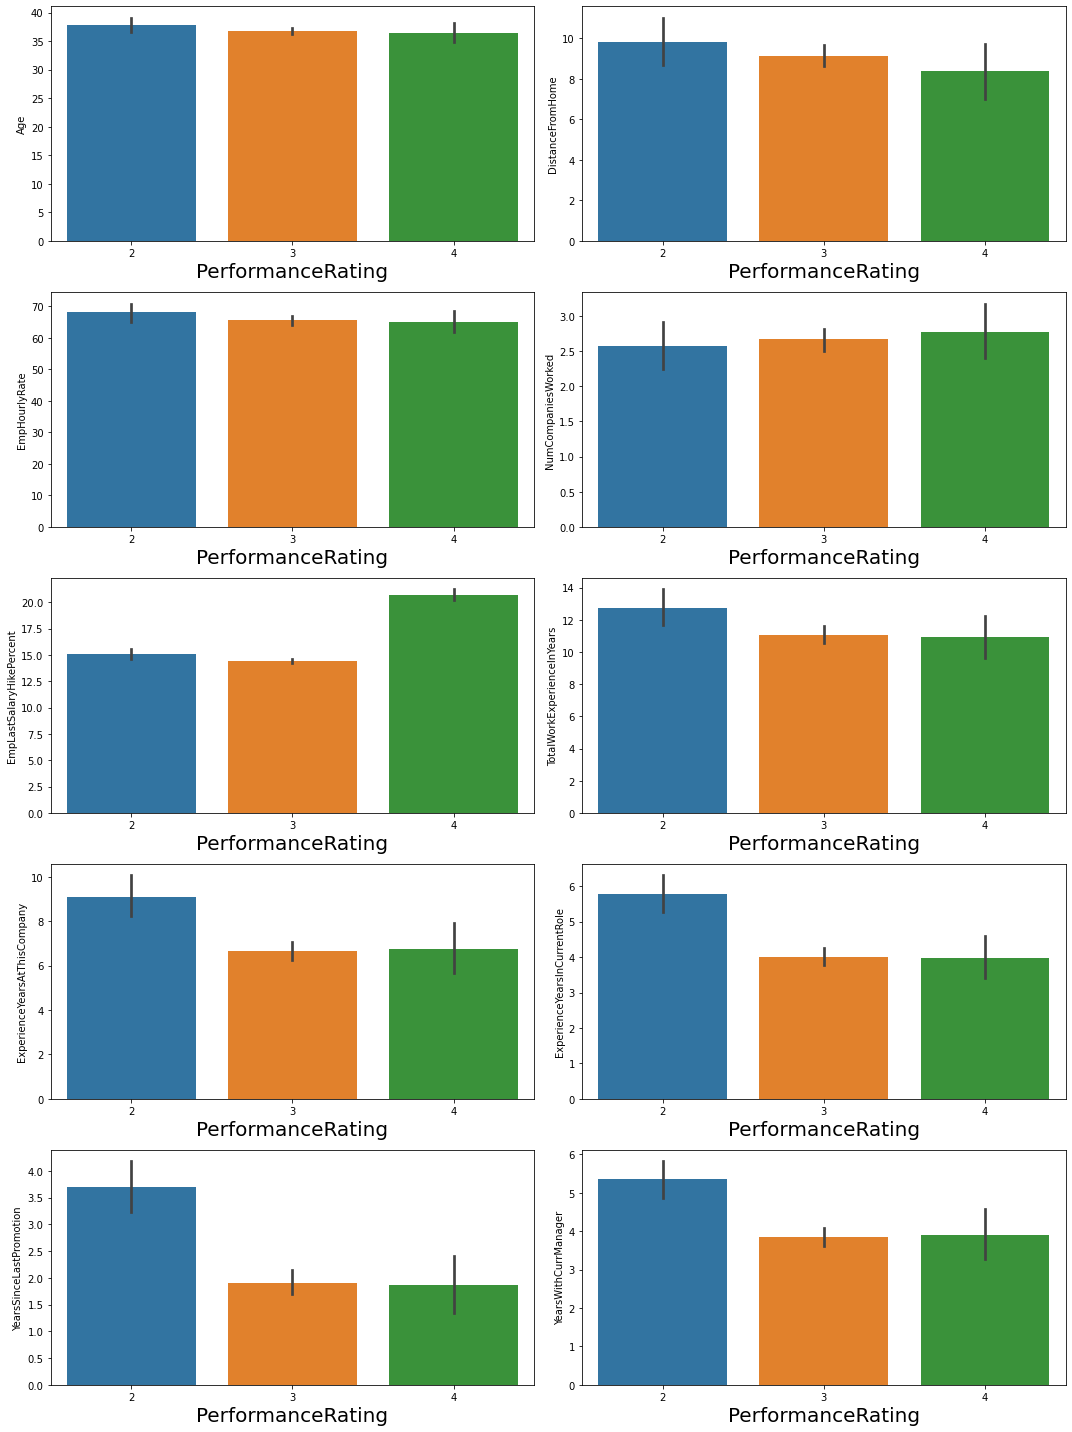

In [10]:
## 1. NUMERICAL FEATURES: A) CONTINUOUS FEATURES :
plt.figure(figsize=(15,20), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in d1:
    if plotnumber<=30 :
        ax = plt.subplot(5,2,plotnumber)
        sns.barplot(x=df['PerformanceRating'], y=d1[column], data=df)
        plt.xlabel('PerformanceRating',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show ()

### NUMERICAL FEATURES: B) Discrete Features :

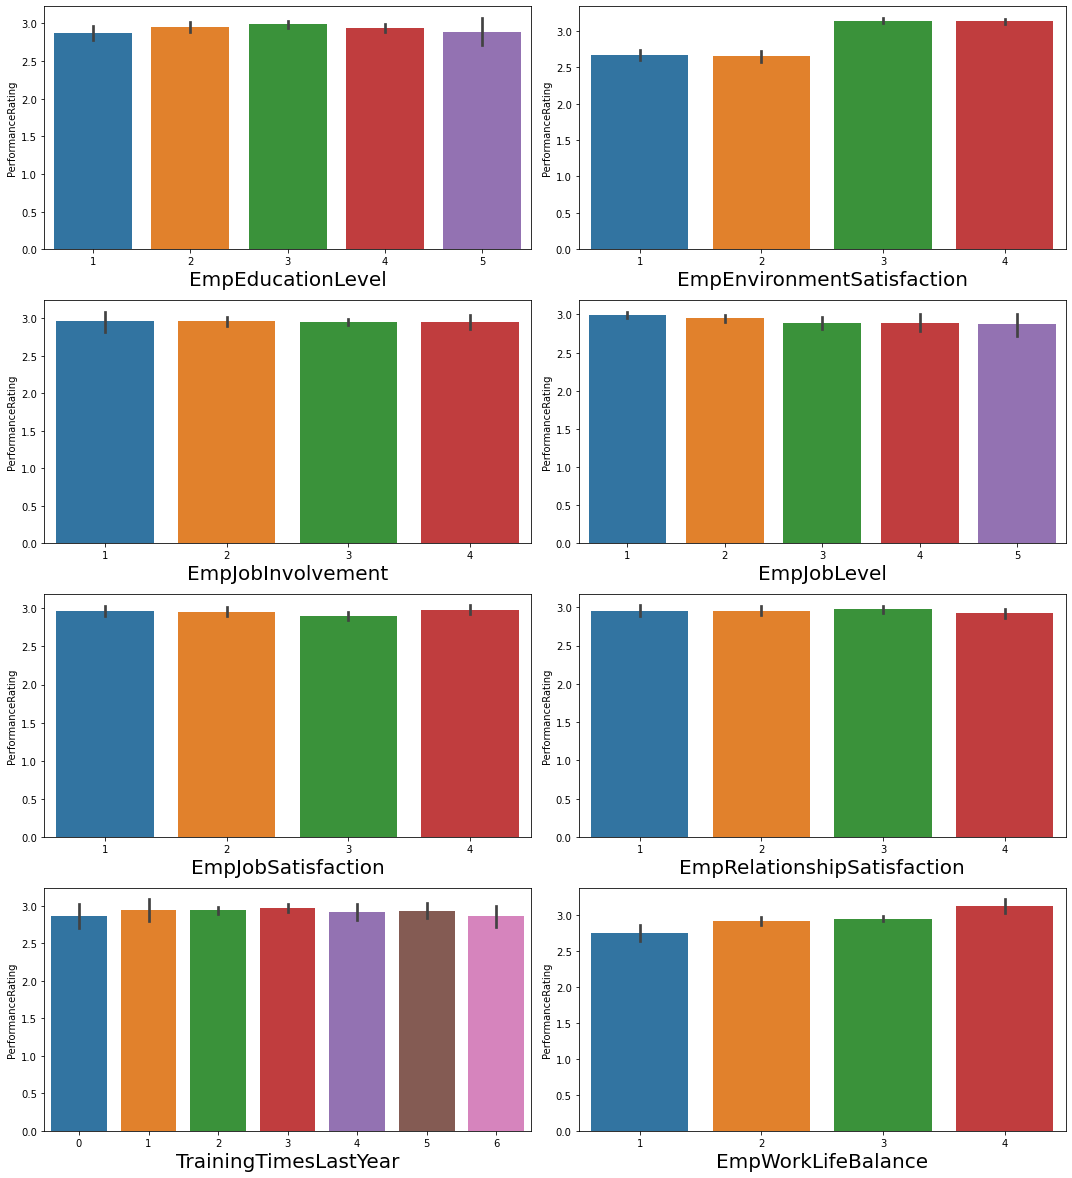

In [11]:
## 1. NUMERICAL FEATURES: B) Discrete FEATURES :

plt.figure(figsize=(15,20), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in d2:
    if plotnumber<=30 :
        ax = plt.subplot(5,2,plotnumber)
        sns.barplot(x=d2[column], y=df['PerformanceRating'], data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show ()

### Insights for numerical features w.r.t. Performance Rating  : 

From the above graphical representation, Performance Rating is mainly affected by the following:
1. EmpLastSalaryHikePercent : If the salary hike is more, performance is more.
2. TotalWorkExperienceInYears : Employee having work experience above 10 years is showing low performance.
3. ExperienceYearsAtThisCompany : More than 6 years in this company, employee has poor performance. 
4. ExperienceYearsInCurrentRole : if experience in current role is above 3.5-4 years, performance is low.
5. YearsSinceLastPromotion : Peformance is high if employee is promoted within 1.5 years.
6. YearsWithCurrManager : Employee working with current manager more than 3.5 - 4 years has low performance.
7. Numerical discrete features do not show any significant relation with performance rating

### Thus we can conclude that performance is directly proportional to :
1. Employee Salary Hike
### Thus we can conclude that performance is inversely proportional to :
1. Years since last promotion.
2. Years with current manager.
3. Experience years in current role.

### 2.CATEOGORICAL FEATURES: 

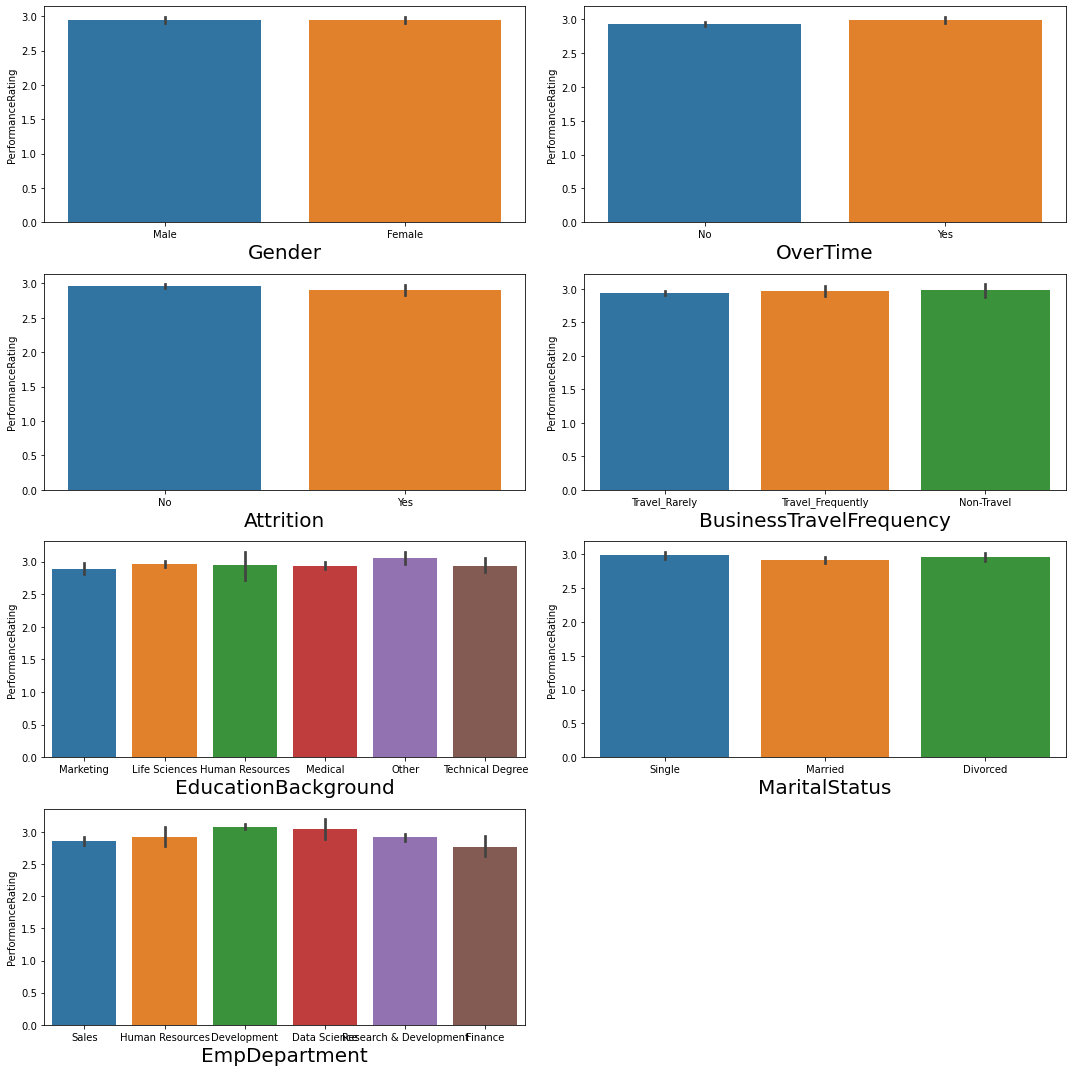

In [12]:
## CATEOGORICAL FEATURES: 
plt.figure(figsize=(15,15), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in d3:
    if plotnumber<=30 :
        ax = plt.subplot(4,2,plotnumber)
        sns.barplot(x=d3[column], y=df['PerformanceRating'], data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show ()


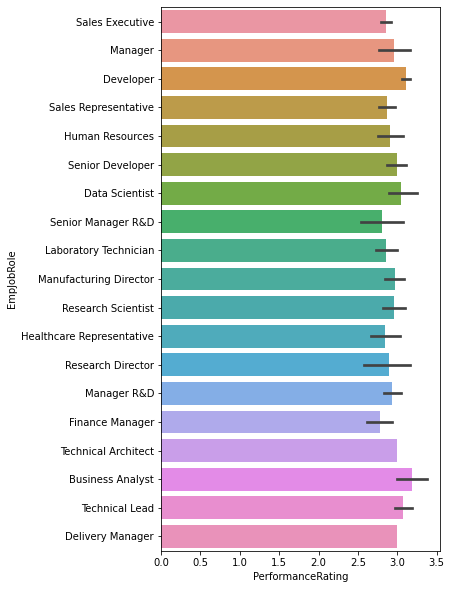

In [13]:
plt.figure(figsize=(5,10), facecolor='white')#To set canvas 
sns.barplot(x=df['PerformanceRating'], y=df['EmpJobRole'], data=df)
plt.show()

### Insights of categorical features w.r.t. Performance Rating :
### Department wise performance analysis:  
1. The performance rating is highest by Development Department followed by Data Science Department.
2. EmpJobRole showing highest performance are : Developer, Data Scientist and Business Analyst.
3. There is need to improve performance in departments of finance and sales.

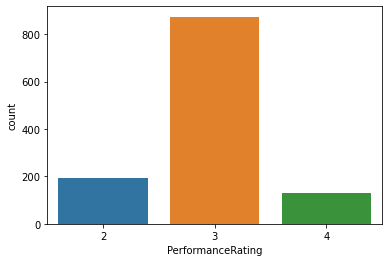

In [14]:
## To check balance of data 
sns.countplot(df['PerformanceRating'])
plt.show()   

The above plot suggests that there is imbalance in data. We will balance the data in further feature engineering steps.

## Data Pre Processing :

### 1. Checking normality of data :

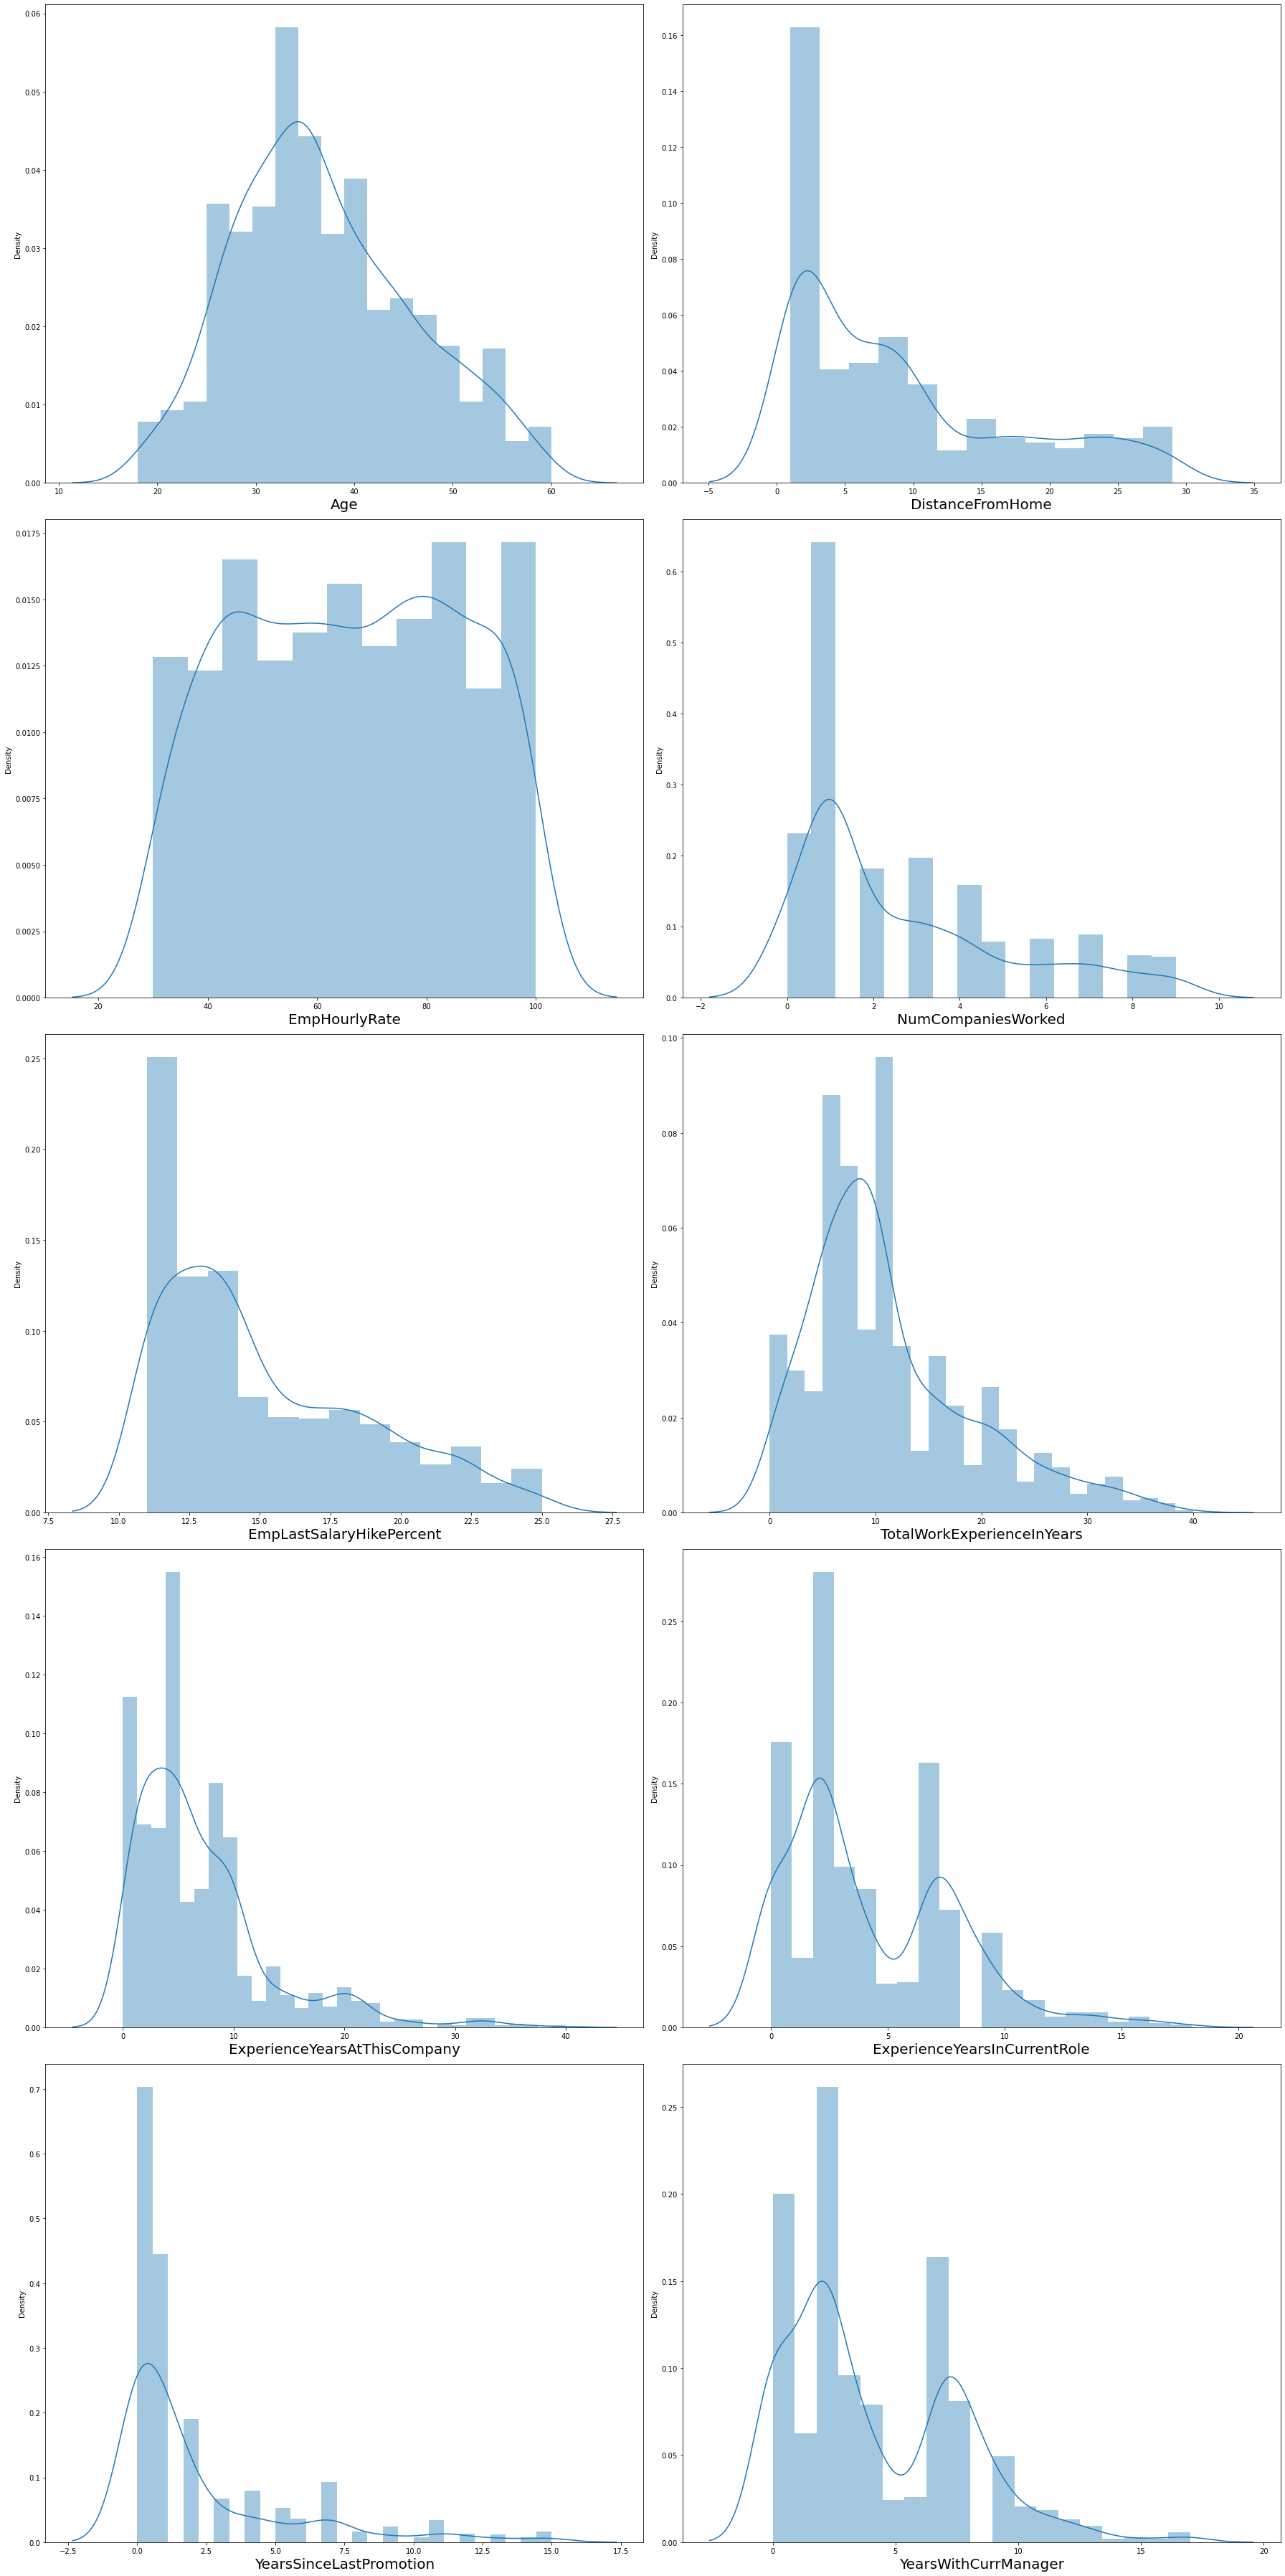

In [15]:
## Checking normality of data :
plt.figure(figsize=(25,50), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in d1:
    if plotnumber<=35 :
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(x=d1[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show ()


###  Data is almost normally distributed. Few features are non-normal as we can see that there are outliers present. We will handle the outliers.

## 2. Converting categorical data to numerical using Label Encoding :

In [16]:
## as there are many columns to use label encoding , we will use for loop to label encode them 
d4=df[['Gender','OverTime','Attrition','EmpJobRole','BusinessTravelFrequency','EducationBackground','MaritalStatus','EmpDepartment']]
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

label_encoders = {}
for column in d4:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column]) 

In [17]:
df.head() ## checking coversion of categorical to numerical data.

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


In [18]:
d5=df[['Age','Gender','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
    'EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
       'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance','OverTime','Attrition',
   'BusinessTravelFrequency','EducationBackground','MaritalStatus','EmpDepartment' ]]

## 3. Checking outliers :

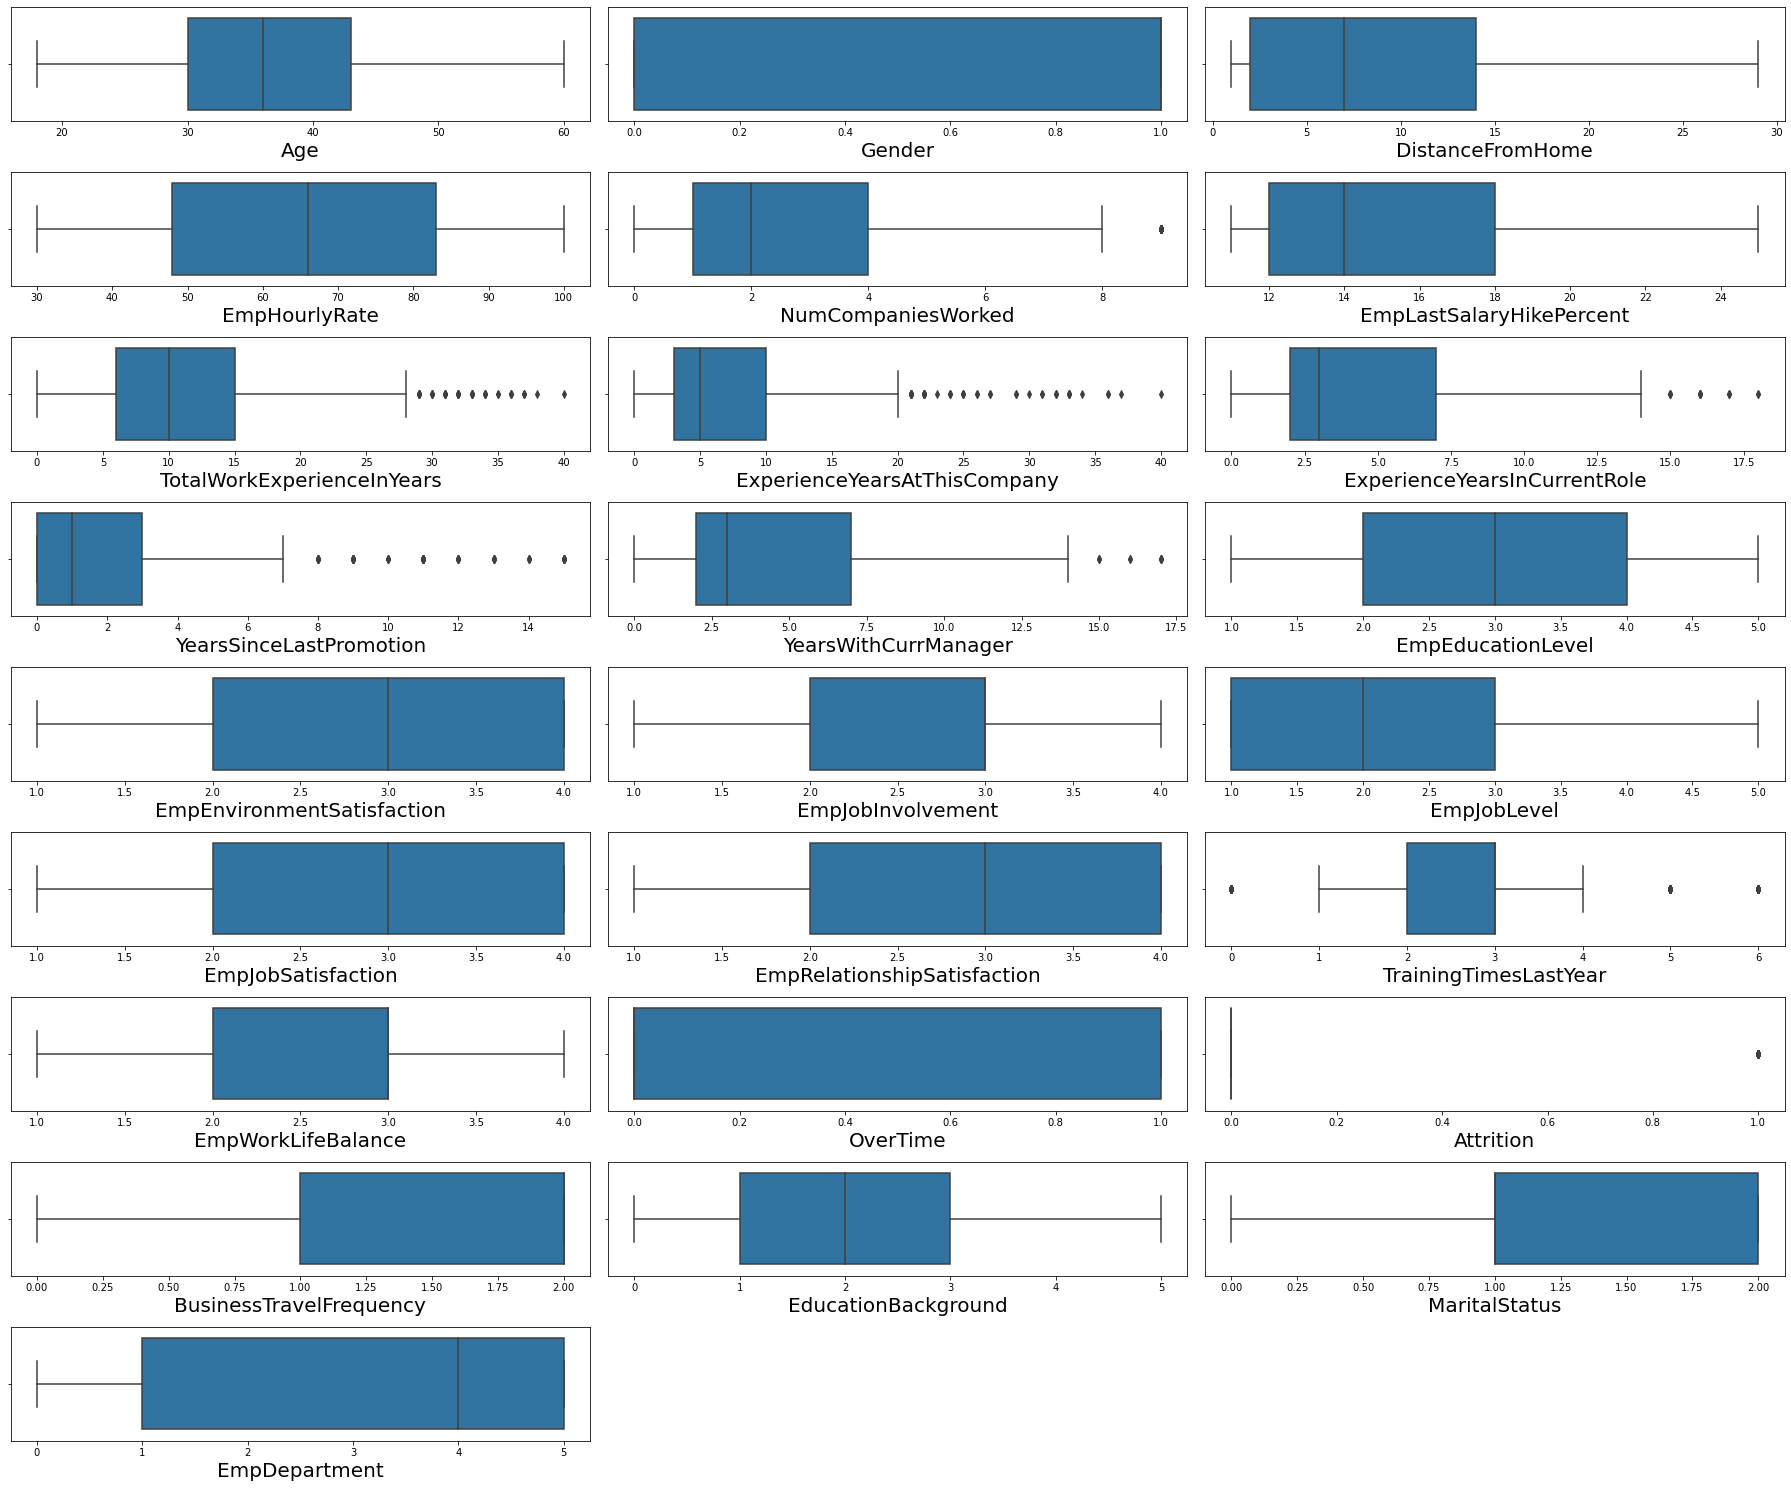

In [19]:
## Checking outliers :
plt.figure(figsize=(25,50)) # defining canvas size
plotnum = 1 # counter

for column in d5: # iteration of columns / acessing the columns from  dataset 
    if plotnum<=35:    # set the limit
        plt.subplot(22,3,plotnum) # # plotting  graphs (5-rows,3-columns) and plotnumber is for count
        sns.boxplot(x = d5[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotnum+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage location


 From above there 7 features that are having outliers. Those features are:
1. NumCompaniesWorked
2. TotalWorkExperienceInYears
3. ExperienceYearsAtThisCompany
4. ExperienceYearsInCurrentRole
5. YearsSinceLastPromotion
6. YearsWithCurrManager
7. TrainingTimesLastYear

But, according to domain knowledge these can be considered as data points.

In [20]:
## Mapping damage grade from 1,2,3 to 0,1,2. 
## This will help in overcoming the error 'Invalid classes infered from unique values of y' while applying XGBoost.

df['PerformanceRating'].replace([2,3,4],[0, 1, 2], inplace=True)

## 4. Creating dependent and independent features :

In [21]:
## Creating x and y 
x = df.drop(columns = ['PerformanceRating']) ## independent variable
y = df['PerformanceRating'] ## Dependent or target variable or the variable which we have to predict

## 5. Feature Selection using Chi-Square test : 

Note : As there are many input features, best features are selected using chi-square test. Based on the chi-square scores, the top three features affecting employee performance are : 
1. Employee Last Salary Hike Percent
2. Years Since Last Promotion
3. ExperienceYearsAtThisCompany

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2

In [23]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [24]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [25]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [26]:
featureScores

,Specs,Score
0,Age,5.170313
1,Gender,0.064501
2,EducationBackground,0.151941
3,MaritalStatus,1.232011
4,EmpDepartment,46.787010
5,EmpJobRole,35.896167
6,BusinessTravelFrequency,1.011364
7,DistanceFromHome,18.650010
8,EmpEducationLevel,0.314038
9,EmpEnvironmentSatisfaction,110.691319


In [27]:
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                           Specs       Score
16      EmpLastSalaryHikePercent  297.136917
23       YearsSinceLastPromotion  238.004284
21  ExperienceYearsAtThisCompany  133.602068
22  ExperienceYearsInCurrentRole  120.860036
9     EmpEnvironmentSatisfaction  110.691319
24          YearsWithCurrManager   87.483471
4                  EmpDepartment   46.787010
18    TotalWorkExperienceInYears   41.593037
5                     EmpJobRole   35.896167
7               DistanceFromHome   18.650010
10                 EmpHourlyRate   17.869736
15                      OverTime    7.963530
12                   EmpJobLevel    6.270263
0                            Age    5.170313
20            EmpWorkLifeBalance    3.876506
25                     Attrition    2.186305
3                  MaritalStatus    1.232011
14            NumCompaniesWorked    1.208359
6        BusinessTravelFrequency    1.011364
19         TrainingTimesLastYear    0.407106


### Note : PCA was applied to reduce dimensions but it did not give good accuracy. Thus, best features using chi-square test are considered. 

In [28]:
## We will take the best features:
X=df[['EmpLastSalaryHikePercent','YearsSinceLastPromotion','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole',
      'EmpEnvironmentSatisfaction','YearsWithCurrManager','EmpDepartment','TotalWorkExperienceInYears','TotalWorkExperienceInYears',
      'EmpJobRole','DistanceFromHome']]
y=df['PerformanceRating']

## 6. Feature Scaling :
### Scaling the data using Standard Scaler.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled= scaler.fit_transform(X)

## 7. Train-test-split

In [31]:
## Train-test-split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

## 8. SMOTE to balance the data

In [32]:
## SMOTE to balance the data

# Apply SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [33]:
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [34]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({1: 642, 0: 157, 2: 101})
SMOTE Classes Counter({1: 642, 2: 642, 0: 642})


## 9. ALGORITHMS APPLIED :

1. Logistic Regression
2. KNN
3. SVC
4. Decision Tree
5. Random Forest
6. XGBoost
7. Neural Network
8. Naive Bayes

## 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()#object creation of logistic regression
    
LR.fit(x_train_smote,y_train_smote)#training model with training data

y_train_LR=LR.predict(x_train_smote)
y_test_LR=LR.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,f1_score
print("Train accuracy :",accuracy_score(y_train_smote,y_train_LR))
print("Test accuracy :",accuracy_score(y_test,y_test_LR))

Train accuracy : 0.818276220145379
Test accuracy : 0.6766666666666666


In [38]:
print(classification_report(y_test,y_test_LR))

              precision    recall  f1-score   support

           0       0.37      0.76      0.50        37
           1       0.95      0.65      0.77       232
           2       0.38      0.81      0.52        31

    accuracy                           0.68       300
   macro avg       0.57      0.74      0.59       300
weighted avg       0.82      0.68      0.71       300



In [39]:
from sklearn.metrics import confusion_matrix
cm_LR=pd.crosstab(y_test,y_test_LR)
cm_LR

col_0,0,1,2
PerformanceRating,,,
0,28,4,5
1,46,150,36
2,2,4,25


In [40]:
#hyper parameter tuning for logistic regression

param=[
    {'penalty':['l1','l2','elasticnet','none'],
     'C' : [1, 10, 100, 0.1, 0.001],
     'solver' : ['lbfgs','liblinear','sag','saga']
        
    }
]

In [41]:
from sklearn.model_selection import GridSearchCV
grid_LR=GridSearchCV(LR,param_grid=param,cv=10,n_jobs=-1)

In [42]:
grid_LR.fit(x_train_smote,y_train_smote)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 0.1, 0.001],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}])

In [43]:
grid_LR.best_estimator_

LogisticRegression(C=1, penalty='none')

In [44]:
grid_LR.best_params_

{'C': 1, 'penalty': 'none', 'solver': 'lbfgs'}

In [45]:
## Applying best parameters for logistic regression

LoR=LogisticRegression(C=0.1, penalty='none')

In [46]:
LoR.fit(x_train_smote,y_train_smote)

LogisticRegression(C=0.1, penalty='none')

In [47]:
y_LoR=LoR.predict(x_test)

In [48]:
print(classification_report(y_test,y_LoR))

              precision    recall  f1-score   support

           0       0.37      0.76      0.50        37
           1       0.95      0.64      0.77       232
           2       0.37      0.81      0.51        31

    accuracy                           0.67       300
   macro avg       0.56      0.74      0.59       300
weighted avg       0.82      0.67      0.71       300



## 2. KNN

In [49]:
## KNN ALGORITHM
## taking optimal k to determine how many nearest neighbors  to create
from sklearn.neighbors import KNeighborsClassifier

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,23):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_smote,y_train_smote)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test)) 
print(np.mean(pred_i != y_test))

0.41


Text(0, 0.5, 'Error Rate')

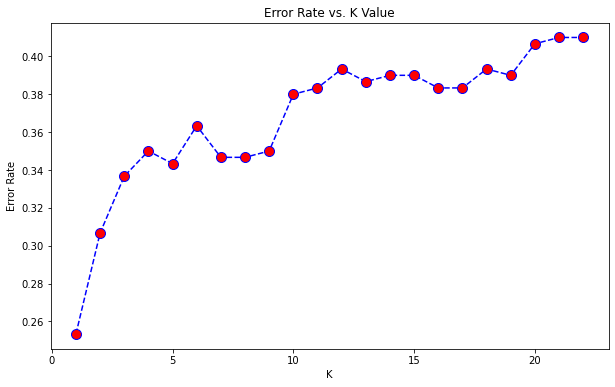

In [50]:
# The k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,23),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [53]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_smote,y_train_smote)
y_pred_KNN = knn.predict(x_test)
y_pred_KNN

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       0, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0,
       1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1,
       2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2,
       0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2], d

In [54]:
#accuracy score for KNN algorithm
print("The accuracy score is : ", accuracy_score(y_test,y_pred_KNN))

The accuracy score is :  0.65


In [55]:
#classification report for KNN algorithm
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.31      0.70      0.43        37
           1       0.93      0.63      0.75       232
           2       0.39      0.71      0.50        31

    accuracy                           0.65       300
   macro avg       0.54      0.68      0.56       300
weighted avg       0.80      0.65      0.69       300



In [56]:
cm_knn=pd.crosstab(y_test,y_pred_KNN)
cm_knn

col_0,0,1,2
PerformanceRating,,,
0,26,5,6
1,56,147,29
2,3,6,22


In [57]:
## Applying Hyper parameter tunning to KNN

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

from sklearn.model_selection import GridSearchCV
KNN_gs = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)


In [58]:
KNN_gs.fit(x_train_smote,y_train_smote)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=4), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [59]:
KNN_gs.best_estimator_

KNeighborsClassifier(metric='manhattan', weights='distance')

In [60]:
KNN_gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [61]:
## Applying best parameters 

knn_ht=KNeighborsClassifier(metric='manhattan', weights='distance')
KNN_gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [62]:
knn_ht.fit(x_train_smote,y_train_smote)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [63]:
y_knn=knn_ht.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

print(classification_report(y_test,y_knn))


              precision    recall  f1-score   support

           0       0.39      0.68      0.50        37
           1       0.92      0.70      0.79       232
           2       0.32      0.61      0.42        31

    accuracy                           0.69       300
   macro avg       0.54      0.66      0.57       300
weighted avg       0.79      0.69      0.72       300



## 3. SVC

In [73]:
#svc model
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=100, random_state=42) ## base model with default parameters
svc.fit(x_train_smote,y_train_smote)
y_train_svc=svc.predict(x_train_smote)
y_test_svc=svc.predict(x_test)
print("Train accuracy :",accuracy_score(y_train_smote,y_train_svc))
print("Test accuracy :",accuracy_score(y_test,y_test_svc))

Train accuracy : 0.9916926272066459
Test accuracy : 0.83


In [74]:
print(classification_report(y_test,y_test_svc))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62        37
           1       0.90      0.89      0.90       232
           2       0.60      0.58      0.59        31

    accuracy                           0.83       300
   macro avg       0.70      0.71      0.70       300
weighted avg       0.83      0.83      0.83       300



In [68]:
cm_svc=pd.crosstab(y_test,y_test_svc)
cm_svc

col_0,0,1,2
PerformanceRating,,,
0,29,5,3
1,25,178,29
2,1,6,24


In [78]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning  ## to avoid nan error or fit_estimator error 

from sklearn.model_selection import GridSearchCV

grid_svc = GridSearchCV(SVC(gamma='auto'),
            {'C':[0.1,1,10,20],
            'kernel':['rbf','linear']}, cv=5, return_train_score=False)

grid_svc.fit(x_train_smote,y_train_smote)


GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [0.1, 1, 10, 20], 'kernel': ['rbf', 'linear']})

In [79]:
grid_svc.best_estimator_

SVC(C=20, gamma='auto')

In [80]:
## Applying best parameters 
svc_HT=SVC(C=20, gamma='auto')
svc_HT.fit(x_train_smote,y_train_smote)
y_train_svh=grid_svc.predict(x_train_smote)
y_test_svh=grid_svc.predict(x_test)
print("Train accuracy :",accuracy_score(y_train_smote,y_train_svh))
print("Test accuracy :",accuracy_score(y_test,y_test_svh))

Train accuracy : 0.9797507788161994
Test accuracy : 0.7933333333333333


In [81]:
print(classification_report(y_test,y_test_svh))

              precision    recall  f1-score   support

           0       0.53      0.70      0.60        37
           1       0.91      0.83      0.87       232
           2       0.49      0.65      0.56        31

    accuracy                           0.79       300
   macro avg       0.64      0.73      0.68       300
weighted avg       0.82      0.79      0.80       300



In [82]:
cm_svh=pd.crosstab(y_test,y_test_svh)
cm_svh

col_0,0,1,2
PerformanceRating,,,
0,26,8,3
1,22,192,18
2,1,10,20


## 4. Decision Tree

In [83]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(x_train_smote,y_train_smote)#training the model
y_train_dt=dt.predict(x_train_smote)
y_test_dt=dt.predict(x_test)#prediction

from sklearn.metrics import accuracy_score,classification_report
print("Train accuracy :",accuracy_score(y_train_smote,y_train_dt))
print("Test accuracy :",accuracy_score(y_test,y_test_dt))

Train accuracy : 1.0
Test accuracy : 0.8533333333333334


In [84]:
print(classification_report(y_test,y_test_dt))

              precision    recall  f1-score   support

           0       0.61      0.81      0.70        37
           1       0.94      0.88      0.91       232
           2       0.66      0.68      0.67        31

    accuracy                           0.85       300
   macro avg       0.73      0.79      0.76       300
weighted avg       0.87      0.85      0.86       300



In [85]:
cm_dt=pd.crosstab(y_test,y_test_dt)
cm_dt

col_0,0,1,2
PerformanceRating,,,
0,30,5,2
1,18,205,9
2,1,9,21


In [86]:
#hyper parameter tuning for decision tree
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


In [87]:
from sklearn.model_selection import GridSearchCV
grd=GridSearchCV(dt,param_grid=params,cv=10,n_jobs=-1)

In [88]:
grd.fit(x_train_smote,y_train_smote)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')})

In [90]:
grd.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=3)

In [91]:
## Applying best parameters

DT=DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=3)

In [92]:
DT.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=3)

In [93]:
y_dt=DT.predict(x_test)

In [94]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        37
           1       0.95      0.92      0.94       232
           2       0.79      0.74      0.77        31

    accuracy                           0.90       300
   macro avg       0.82      0.85      0.83       300
weighted avg       0.91      0.90      0.90       300



In [95]:
pd.crosstab(y_test,y_dt)# confusion matrix 

col_0,0,1,2
PerformanceRating,,,
0,33,4,0
1,12,214,6
2,1,7,23


## 5. Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_smote,y_train_smote)
y_train_rf=rf.predict(x_train_smote)
y_test_rf=rf.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train_smote,y_train_rf))
print("Test accuracy :",accuracy_score(y_test,y_test_rf))

Train accuracy : 1.0
Test accuracy : 0.9266666666666666


In [97]:
print(classification_report(y_test,y_test_rf))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.95      0.96      0.95       232
           2       0.88      0.74      0.81        31

    accuracy                           0.93       300
   macro avg       0.89      0.86      0.87       300
weighted avg       0.93      0.93      0.93       300



In [98]:
## confusion matrix
cm_rf=pd.crosstab(y_test,y_test_rf)
cm_rf

col_0,0,1,2
PerformanceRating,,,
0,33,4,0
1,7,222,3
2,0,8,23


In [99]:
## Hyper parameter tuning of random forest 

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [100]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3,
                               verbose=2, random_state=42, n_jobs = -1)

In [101]:
# Fit the random search model
rf_random.fit(x_train_smote,y_train_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [103]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_split=5,
                       n_estimators=600)

In [104]:
## Applying best parameters
rf_clf = RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_split=5 ,
                       n_estimators=600)

In [105]:
y_rf_predict=rf_random.predict(x_test)

In [106]:
print(classification_report(y_test,y_rf_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.94      0.96      0.95       232
           2       0.92      0.71      0.80        31

    accuracy                           0.93       300
   macro avg       0.90      0.85      0.87       300
weighted avg       0.93      0.93      0.93       300



In [107]:
from sklearn.metrics import confusion_matrix
pd.crosstab(y_test,y_rf_predict)

col_0,0,1,2
PerformanceRating,,,
0,33,4,0
1,7,223,2
2,0,9,22


## 6. XGBoost

In [108]:
## importing XG boost  algorithm
from xgboost import XGBClassifier#importing the model library
xgb=XGBClassifier() ## object creation
xgb.fit(x_train_smote,y_train_smote)# fitting the data
y_train_xgb=xgb.predict(x_train_smote)
y_test_xgb=xgb.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train_smote,y_train_xgb))
print("Test accuracy :",accuracy_score(y_test,y_test_xgb))

Train accuracy : 1.0
Test accuracy : 0.8933333333333333


In [109]:
print(classification_report(y_test,y_test_xgb))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        37
           1       0.93      0.93      0.93       232
           2       0.79      0.74      0.77        31

    accuracy                           0.89       300
   macro avg       0.82      0.83      0.82       300
weighted avg       0.90      0.89      0.89       300



In [110]:
## confusion matrix
cm_xgb=pd.crosstab(y_test,y_test_xgb)
cm_xgb

col_0,0,1,2
PerformanceRating,,,
0,30,7,0
1,11,215,6
2,0,8,23


In [111]:
#Hyper parameter tuning for XG boost algorithm
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
                        
rcv.fit(x_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 1.6, 'reg_alpha': 12.8, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.6, 'gamma': 0})


In [112]:
## Applying best parameters 
XGB2=XGBClassifier(reg_lambda=1.6, reg_alpha=12.8, n_estimators=50, max_depth=8, learning_rate=0.6, gamma=0)
XGB2.fit(x_train_smote, y_train_smote)#training 
y_predict=XGB2.predict(x_test)#testing

In [113]:
#classification report for xg boost afrer applying hyper parameter tuning
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        37
           1       0.95      0.90      0.92       232
           2       0.65      0.77      0.71        31

    accuracy                           0.89       300
   macro avg       0.79      0.86      0.82       300
weighted avg       0.90      0.89      0.89       300



## 7. Neural Network

In [114]:
## model creation
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=42) ## model object creation max_iter=Stopping parameter
MLP.fit(x_train_smote,y_train_smote) ## training the data
y_test_proba = MLP.predict_proba(x_test) 
y_test_mlp = MLP.predict(x_test)
y_train_mlp = MLP.predict(x_train_smote)
print("Train accuracy :",accuracy_score(y_train_smote,y_train_mlp))
print("Test accuracy :",accuracy_score(y_test,y_test_mlp))

Train accuracy : 0.9688473520249221
Test accuracy : 0.8733333333333333


In [115]:
print(classification_report(y_test,y_test_mlp))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78        37
           1       0.92      0.93      0.93       232
           2       0.65      0.48      0.56        31

    accuracy                           0.87       300
   macro avg       0.77      0.75      0.76       300
weighted avg       0.87      0.87      0.87       300



In [116]:
## confusion matrix
cm_mlp=pd.crosstab(y_test,y_test_mlp)
cm_mlp

col_0,0,1,2
PerformanceRating,,,
0,31,5,1
1,9,216,7
2,2,14,15


In [117]:
mlp_param  = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
mlp_grid = GridSearchCV(MLP, mlp_param, n_jobs=-1, cv=5)
mlp_grid.fit(x_train_smote,y_train_smote)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(50, 3),
                                     learning_rate_init=0.1, max_iter=100,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [118]:
mlp_grid.best_estimator_

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(10, 30, 10),
              learning_rate_init=0.1, max_iter=100, random_state=42,
              solver='sgd')

In [119]:
## Applying best parameter 
mlph=MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(10, 30, 10),
              learning_rate_init=0.1, max_iter=100, random_state=42,
              solver='sgd')
mlph.fit(x_train,y_train)
y_train_mlph=mlph.predict(x_train_smote)
y_test_mlph=mlph.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train_smote,y_train_mlph))
print("Test accuracy :",accuracy_score(y_test,y_test_mlph))

Train accuracy : 0.9065420560747663
Test accuracy : 0.84


In [120]:
print(classification_report(y_test,y_test_mlph))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        37
           1       0.91      0.89      0.90       232
           2       0.68      0.61      0.64        31

    accuracy                           0.84       300
   macro avg       0.73      0.74      0.73       300
weighted avg       0.85      0.84      0.84       300



In [121]:
## confusion matrix
cm_mlph=pd.crosstab(y_test,y_test_mlph)
cm_mlph

col_0,0,1,2
PerformanceRating,,,
0,26,9,2
1,18,207,7
2,0,12,19


## 8. Naive Bayes

In [122]:
### Naive Bayes 
# Initialising the model
from sklearn.naive_bayes import GaussianNB   
NB = GaussianNB()
NB.fit(x_train_smote,y_train_smote) # feed data to the model

GaussianNB()

In [123]:
y_nb=NB.predict(x_test)

In [124]:
# Checking accuracy

accuracyScore = accuracy_score(y_test,y_nb)
accuracyScore

0.7166666666666667

In [125]:
print(classification_report(y_test,y_nb))

              precision    recall  f1-score   support

           0       0.41      0.70      0.52        37
           1       0.93      0.71      0.80       232
           2       0.41      0.81      0.54        31

    accuracy                           0.72       300
   macro avg       0.58      0.74      0.62       300
weighted avg       0.81      0.72      0.74       300



In [126]:
from sklearn.metrics import confusion_matrix
pd.crosstab(y_test,y_nb)

col_0,0,1,2
PerformanceRating,,,
0,26,7,4
1,36,164,32
2,1,5,25


In [127]:
#hyper parameter tuning for navive bayes
 
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_nb = GridSearchCV(estimator=NB, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
grid_nb.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [128]:
grid_nb.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [129]:
grid_nb.best_params_

{'var_smoothing': 0.006579332246575682}

In [130]:
grid_nb.best_estimator_

GaussianNB(var_smoothing=0.006579332246575682)

In [131]:
## Applying best parameter 
MNB=GaussianNB(var_smoothing=0.006579332246575682)

In [132]:
MNB.fit(x_train_smote,y_train_smote)

GaussianNB(var_smoothing=0.006579332246575682)

In [133]:
y_MNB=MNB.predict(x_test)

In [134]:
print(classification_report(y_test,y_MNB))

              precision    recall  f1-score   support

           0       0.39      0.70      0.50        37
           1       0.93      0.69      0.80       232
           2       0.41      0.81      0.54        31

    accuracy                           0.71       300
   macro avg       0.58      0.73      0.61       300
weighted avg       0.81      0.71      0.73       300



### Hyper parameter tuning is not showing any difference to the accuracy scores of all the algorithms except for Decision Tree. Thus, we will consider accuracies of other algorithms by default.

## Accuracy of all algorithms :

In [137]:
## Accuracy of all algorithms in tabular form :

from tabulate import tabulate

D=[[1,"Logistic Reg", 68],
   [2,"KNN", 69],
   [3,"SVC", 83],
   [4,"Decision Tree", 90],
   [5,"Random Forest", 93],
   [6,"XGBoost", 89],
   [7,"Naive Bayes", 72]]

print (tabulate(D, headers=['Sr_No','ML_Algorithm','Accuracy in %']))

  Sr_No  ML_Algorithm      Accuracy in %
-------  --------------  ---------------
      1  Logistic Reg                 68
      2  KNN                          69
      3  SVC                          83
      4  Decision Tree                90
      5  Random Forest                93
      6  XGBoost                      89
      7  Naive Bayes                  72


### For this data set, the algorithms showing better performance are:
1. Random Forest
2. Decision Tree

### Let's apply straified cross validation score to the performance of these algorithms

In [138]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=10)

In [139]:
rf_cv=cross_val_score(rf,x,y,cv=skfold) ## rf_cv= cross validation score for random forest
DT_cv=cross_val_score(DT,x,y,cv=skfold) ## DT_cv= cross validation score for decision tree

In [140]:
## rf = random forest, DT = Decsision Tree

print("Cross val score for rf:", rf_cv)
print("Cross val score for DT:", DT_cv)

Cross val score for rf: [0.89166667 0.91666667 0.98333333 0.93333333 0.98333333 0.98333333
 0.94166667 0.89166667 0.89166667 0.90833333]
Cross val score for DT: [0.875      0.91666667 0.96666667 0.91666667 0.95833333 0.975
 0.91666667 0.85833333 0.9        0.875     ]


In [141]:
r=np.mean(rf_cv) ## r = mean of cross validation scores of random forest
s=np.mean(DT_cv) ## s = mean of cross validation scores of decision tree
print("Mean of Cross val score for rf:", r)
print("Mean of Cross val score for DT:", s)

Mean of Cross val score for rf: 0.9324999999999999
Mean of Cross val score for DT: 0.9158333333333333


In [142]:
import pandas as pd
from tabulate import tabulate

L={ 'Algorithms': ['Random Forest','Decision Tree'],
     'Mean of Cross validation Scores': [0.9324,0.9158]}

df1=pd.DataFrame(L)
df1=pd.DataFrame(L,index=[1,2])
df1

,Algorithms,Mean of Cross validation Scores
1,Random Forest,0.9324
2,Decision Tree,0.9158


## Best cross validation score is shown by Random Forest. Thus, random forest model is best suited for this data set followed by Decision Tree.